In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [77]:
try:
    layer = tf.keras.layers.LSTM(units=50, return_sequences=True)
    print("tf.keras.models!")
except AttributeError as e:
    print(f"Error: {e}")

tf.keras.models!


In [78]:
price_gold = pd.read_csv('https://raw.githubusercontent.com/elm19/GoldSpot-Predictor/refs/heads/main/data/processed-data/meged_data_all.csv', index_col='Date')
print(price_gold.head())

lookback_period = 10
test_size = 0.2

data = price_gold[['Open', 'Close', 'High', 'Low', 'Vol.']].copy()
data = data.dropna()  # Handle potential missing values

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

             Close    Open    High     Low      Vol. Change %  Day_Friday  \
Date                                                                        
2019-01-01  1281.3  1283.0  1286.5  1279.7  113260.0   -0.13%         0.0   
2019-01-02  1284.1  1285.0  1291.0  1280.6  235330.0    0.22%         0.0   
2019-01-03  1294.8  1288.5  1296.9  1286.4  244540.0    0.83%         0.0   
2019-01-04  1285.8  1296.5  1300.4  1278.1  316060.0   -0.70%         1.0   
2019-01-05  1285.8  1296.5  1300.4  1278.1  316060.0   -0.70%         0.0   

            Day_Monday  Day_Saturday  Day_Sunday  ...  \
Date                                              ...   
2019-01-01         0.0           0.0         0.0  ...   
2019-01-02         0.0           0.0         0.0  ...   
2019-01-03         0.0           0.0         0.0  ...   
2019-01-04         0.0           0.0         0.0  ...   
2019-01-05         0.0           0.0         0.0  ...   

            Event_Unemployment Rate DEC  Event_Unemployment 

In [79]:
price_gold.shape

(1796, 499)

In [80]:
import numpy as np

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data) - 6):
        X.append(data[i - lookback:i])
        y.append(data[i:i + 6, 1])                    # Prédiction : 6 prochaines valeurs de la colonne 1 (ex : 'Close')
    return np.array(X), np.array(y)


X, y = create_sequences(scaled_data, lookback_period)

# Split into training and testing sets
train_size = int(len(X) * (1 - test_size))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1424, 10, 5)
Shape of X_test: (356, 10, 5)
Shape of y_train: (1424, 6)
Shape of y_test: (356, 6)


In [81]:
import tensorflow as tf

# Création du modèle LSTM
model_LSTM = tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_LSTM.add(tf.keras.layers.LSTM(units=50))
model_LSTM.add(tf.keras.layers.Dense(units=6))

model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1219
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0039
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 16/50
45/

In [82]:
model_LSTM.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 10, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,120 (371.57 KB)

 Trainable params: 31,706 (123.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,414 (247.71 KB)

Plot de  loss


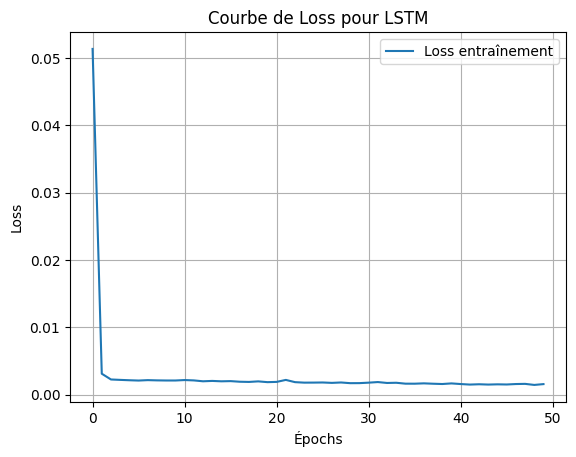

In [83]:
plt.plot(history_LSTM.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
LSTM_MSE = model_LSTM.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017      


In [85]:
predicted_scaled = model_LSTM.predict(X_test)

# Inverse transform the predictions
predicted_prices = np.zeros((predicted_scaled.shape[0], predicted_scaled.shape[1]))
for i in range(predicted_scaled.shape[1]):
    dummy_predictions = np.zeros((len(predicted_scaled), 5))
    dummy_predictions[:, 1] = predicted_scaled[:, i]
    predicted_prices[:, i] = scaler.inverse_transform(dummy_predictions)[:, 1]

# Get the actual 'Close' prices from the test set
test_start_index = int(len(data) * (1 - test_size))+lookback_period
actual_close_test = data['Close'].iloc[test_start_index:]
num_test_samples = predicted_prices.shape[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


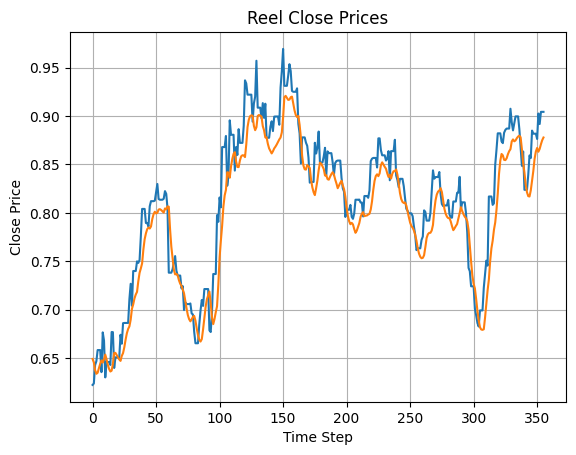

In [86]:
reel_prices = [y_test[i, 0] for i in range(y_test.shape[0])]
reel_prices = np.array(reel_prices)
plt.plot(reel_prices)
plt.plot([predicted_scaled[i, 0] for i in range(len(predicted_scaled)) ])
plt.title('Reel Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

RNN

In [87]:
model_RNN = tf.keras.models.Sequential()
model_RNN.add(tf.keras.layers.SimpleRNN(units=50,activation = "tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_RNN.add(tf.keras.layers.SimpleRNN(units=50))
model_RNN.add(tf.keras.layers.Dense(units=6))  # Output layer to predict the next 'Close' price

# 3. Compile the model
Adam=tf.keras.optimizers.Adam(learning_rate=0.04)
model_RNN.compile(optimizer='adam', loss='mean_squared_error')

model_RNN.compile(optimizer = Adam,
                  loss = "mean_squared_error",
                  metrics=['mae'])

# 4. Train the model
history_RNN= model_RNN.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



model_RNN.summary()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6967 - mae: 0.5075
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mae: 0.0799
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mae: 0.0715
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mae: 0.0683
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mae: 0.0539
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mae: 0.0625
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mae: 0.0757
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - mae: 0.0650
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205 - mae: 0.1144
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - mae: 0.1030
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mae: 0.0466
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - mae: 0.0816
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 10, 50)              │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,470 (95.59 KB)

 Trainable params: 8,156 (31.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,314 (63.73 KB)

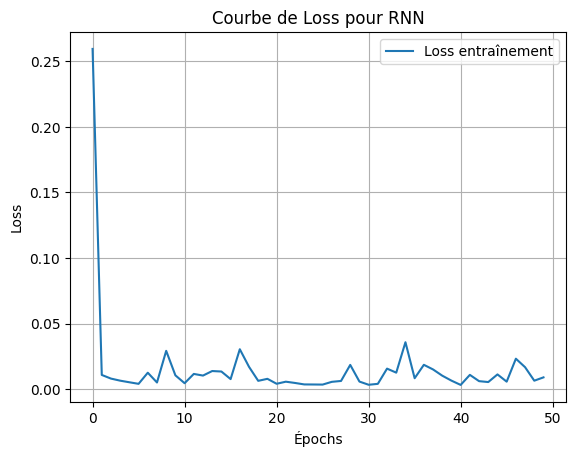

In [88]:
plt.plot(history_RNN.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour RNN')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
RNN_MSE = model_RNN.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0370  


In [90]:
y_predicted_scaled_RNN=model_RNN.predict(X_test)

# Inverse transform the predictions
y_predicted_scaled_RNN = np.zeros((predicted_scaled.shape[0], predicted_scaled.shape[1]))
for i in range(predicted_scaled.shape[1]):
    dummy_predictions = np.zeros((len(predicted_scaled), 5))
    dummy_predictions[:, 1] = predicted_scaled[:, i]
    y_predicted_scaled_RNN[:, i] = scaler.inverse_transform(dummy_predictions)[:, 1]

# Get the actual 'Close' prices from the test set
test_start_index = int(len(data) * (1 - test_size))+lookback_period
actual_close_test = data['Close'].iloc[test_start_index:]
num_test_samples = y_predicted_scaled_RNN.shape[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


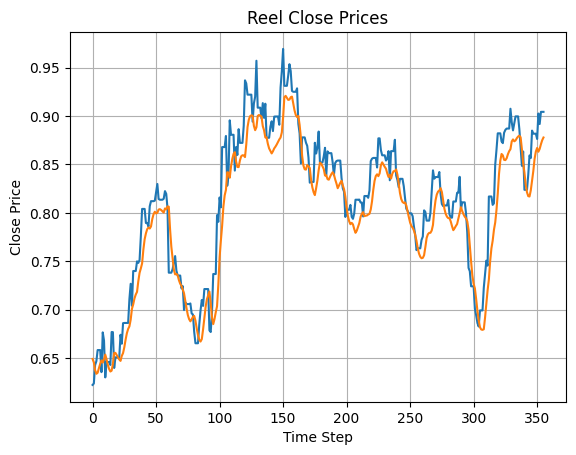

In [91]:
reel_prices = [y_test[i, 0] for i in range(y_test.shape[0])]
reel_prices = np.array(reel_prices)
plt.plot(reel_prices)
plt.plot([predicted_scaled[i, 0] for i in range(len(predicted_scaled)) ])
plt.title('Reel Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

GRU

In [92]:
model_GRU = tf.keras.models.Sequential()
model_GRU.add(tf.keras.layers.GRU(units=50,activation = "tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_GRU.add(tf.keras.layers.GRU(units=32))
model_GRU.add(tf.keras.layers.Dense(units=6))  # Output layer to predict the next 'Close' price

# 3. Compile the model
Adam=tf.keras.optimizers.Adam(learning_rate=0.04)
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

model_GRU.compile(optimizer = Adam,
                  loss = "mean_squared_error",
                  metrics=['mae'])

# 4. Train the model

history_GRU= model_GRU.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

model_GRU.summary()



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4485 - mae: 0.3919
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - mae: 0.0390
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - mae: 0.0396
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - mae: 0.0286
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023 - mae: 0.0370
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - mae: 0.0306
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - mae: 0.0373
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020 - mae: 0.0337
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017 - mae: 0.0316
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015 - mae: 0.0290
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - mae: 0.0266
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - mae: 0.0349
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/s

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 10, 50)              │           8,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 32)                  │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,438 (197.03 KB)

 Trainable params: 16,812 (65.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,626 (131.36 KB)

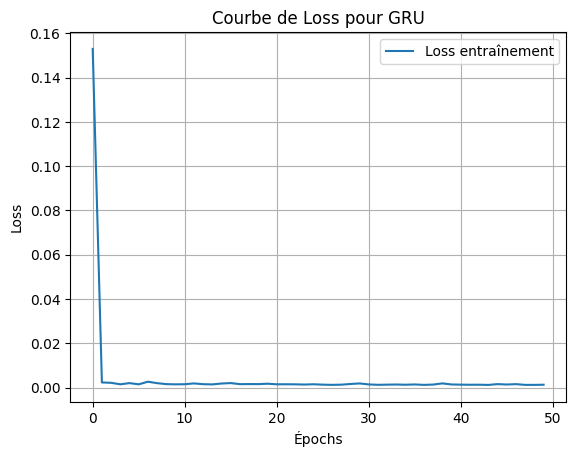

In [93]:
plt.plot(history_GRU.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour GRU')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
GRU_MSE = model_GRU.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mae: 0.0269


In [95]:
y_predicted_scaled_GRU = model_GRU.predict(X_test)

# Inverse transform the predictions
y_predicted_scaled_GRU = np.zeros((predicted_scaled.shape[0], predicted_scaled.shape[1]))
for i in range(predicted_scaled.shape[1]):
    dummy_predictions = np.zeros((len(predicted_scaled), 5))
    dummy_predictions[:, 1] = predicted_scaled[:, i]
    y_predicted_scaled_GRU[:, i] = scaler.inverse_transform(dummy_predictions)[:, 1]

# Get the actual 'Close' prices from the test set
test_start_index = int(len(data) * (1 - test_size))+lookback_period
actual_close_test = data['Close'].iloc[test_start_index:]
num_test_samples = y_predicted_scaled_GRU.shape[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


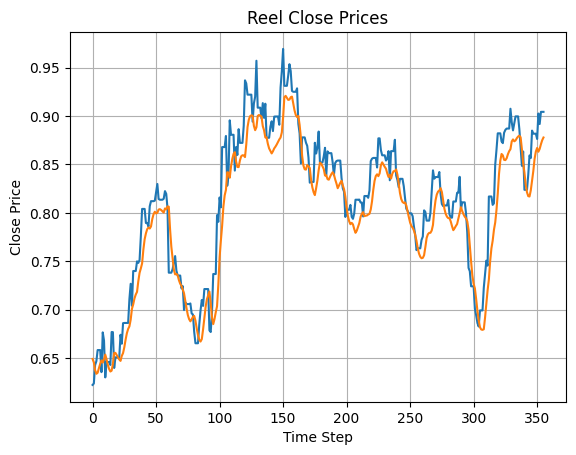

In [96]:
reel_prices = [y_test[i, 0] for i in range(y_test.shape[0])]
reel_prices = np.array(reel_prices)
plt.plot(reel_prices)
plt.plot([predicted_scaled[i, 0] for i in range(len(predicted_scaled)) ])
plt.title('Reel Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

In [97]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model_GRU.fit(X_train, y_train, epochs=50,
          callbacks=[tensorboard_callback])

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015 - mae: 0.0299
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013 - mae: 0.0269
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - mae: 0.0252
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012 - mae: 0.0260
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - mae: 0.0262
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011 - mae: 0.0242
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - mae: 0.0262
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - mae: 0.0259
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013 - mae: 0.0264
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - mae: 0.0274
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014 - mae: 0.0279
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017 - mae: 0.0318
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━

for collab

In [98]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit


for terminal


In [99]:
# !tensorboard --logdir=logs/fit

In [100]:
print("LSTM MSE:", LSTM_MSE)
print("RNN MSE:", RNN_MSE)
print("GRU MSE:", GRU_MSE)

LSTM MSE: 0.0019261633278802037
RNN MSE: [0.002340748207643628, 0.03838743641972542]
GRU MSE: [0.0013934833696112037, 0.029003925621509552]
